## Data preprocessing for binary multi-tasks classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# the original data was downloaded from https://www.chemicalgenomicsoftb.com/

df = pd.DataFrame(pd.read_csv('../../Data/CGIP/47K_SMILES_Zscore.csv'))
df

,compound_stem,SMILES,H37Rv,aceE,acn,adoK,alaS,argC,argG,aroF,...,serC,sucC,thyA,topA,tpi,trmD,trpG,trpS,tyrS,wbbL2
0,A00052363,CN(C)C(=O)CC1CC2(CCN(CC2)C(=O)N2CCCC2)Oc2ccccc12,-3.923440,-0.186840,-0.372712,-0.708584,-0.354361,-3.385461,-1.889130,-1.323071,...,-1.463942,-1.702488,-2.026646,0.162551,-1.821560,-0.853065,-1.661776,-1.287232,-0.654061,-0.773601
1,A00055639,Cc1c([nH]c2CC(CC(=O)c12)c1ccco1)C(=O)OCC1CCCO1,-4.182788,-0.403711,-0.290233,0.349492,0.768448,-0.015474,1.759809,-1.105270,...,0.593244,-1.616245,2.184904,1.774402,-0.713560,1.290003,-0.222235,-0.519305,-0.568978,-0.163753
2,A00064324,CNC(=O)CN1CCC11CCN(C1)C(=O)c1ccn(C)n1,0.470346,-0.530193,-0.436015,0.325957,1.483548,-0.569504,-1.148634,-0.364720,...,-0.823989,-0.345311,0.854772,-0.798470,-0.903833,0.249824,-0.158106,0.657085,-0.004443,0.022146
3,A00076817,Cn1cc(cn1)N1CCC2(CCN(C2)C(=O)c2ccncc2)C1=O,-0.791331,-1.506962,-0.803499,0.942003,-0.741653,1.203885,-0.644423,-0.614777,...,0.089820,-1.304618,-0.009477,0.873446,-0.644616,-0.917323,-1.187369,-0.631162,0.554714,-0.520851
4,A00079315,CC(C)CN1CC2CN(CC2C1)S(=O)(=O)c1ccccc1,-0.092778,-0.516141,0.936416,-1.212051,0.244559,0.638950,-1.273119,-1.266604,...,-1.268936,-0.646760,1.254504,-0.760093,-1.527406,0.968937,0.415625,-0.236434,-0.844336,-0.294440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47212,M97113494,[Zn++].CCC(C)[C@H](N)C1=NCC(S1)C(=O)N[C@@H](CC...,0.514177,0.980957,-2.197749,1.908744,0.048185,0.283596,-1.777284,-0.671545,...,0.056143,0.360308,-3.333996,-0.710901,-0.902193,1.267656,2.015826,-1.191568,1.423105,-0.358975
47213,M97315308,CCCNC(=O)[C@@H]1[C@@H](CO)[C@@H]2Cn3c(=O)c(ccc...,-0.206618,-1.623947,-0.395871,-2.072408,0.244903,-2.614213,-0.825598,-1.464259,...,-0.163646,-1.033276,-0.629121,-0.491622,-1.960521,-1.447752,-0.888941,0.469249,-1.744715,-0.997982
47214,M97497096,C\C=C\c1ccc2[C@H]3N[C@H]([C@H](CO)[C@H]3Cn2c1=...,-1.887529,1.886573,-1.847796,1.553093,1.892817,-0.289263,-1.870233,-0.421925,...,-1.112165,-0.122037,-0.790387,-1.260171,0.005589,-0.271173,1.667999,-0.404332,0.395356,1.368825
47215,M99992213,CCN1[C@@H](C(=O)Nc2ccccc2)[C@H](CO)[C@H]2Cn3c(...,-0.850395,-0.123980,-2.258723,0.195602,0.258761,-0.071759,-1.992976,-1.285286,...,-0.402299,-0.999555,-0.879268,-1.487173,-1.216250,-2.043465,-0.422414,0.268435,-1.327679,-1.049982


In [4]:
# Assign genes to 13 clusters according to the results of hierarchical clustering

G1 = df[['acn','dlat','fum','leuB','mdh','ndhA','sucC','Rv0338c','Rv0526']]
G2 = df[['alaS','aspS','cysS1','infB','leuS','metS','ppm1','prfA','proS','trpS','tyrS']]
G3 = df[['argC','argG','asnB','aspB','dapB','dapE','dapF','gltB','ilvC','leuA','lysA','serC','Rv2747']]
G4 = df[['aroF','hisI','proB','proC','trpG']]
G5 = df[['canB','cstA','dnaK','efpA','ftsK','nrdH','otsA','parA','secY']]
G6 = df[['def','fmt','gpsI','iscS','mprB','pcnA','pyrB','trmD','Rv1339','Rv2190c']]
G7 = df[['dfrA.','folB','metE','purL','rocA']]
G8 = df[['dnaN','gyrA','gyrB','lipU','nusA','topA','Rv0260c','Rv0282','Rv3644c']]
G9 = df[['dxr','fadD30','fadD32','fas','grcC1','kasA','kasB','lipA','menD','menE','menH']]
G10 = df[['eno','fba','gcvB','gcvH','glcB','glgB','otsB1','tpi']]
G11 = df[['ftsW','manA','murA','murC','murD','murG']]
G12 = df[['gca','glmU','guaB2','nrdF2','purD','purM','pyrH','thyA']]
G13 = df[['hemA','hemB','hemC','hemL','hemZ']]

In [5]:
# generate data with median Z-score and binarized data

pd.options.mode.chained_assignment = None
for i in range(13):
    cluster = locals()['G'+str(i+1)]
    cluster_med = cluster.median(1)
    mask_i = (cluster_med < -4)
    cluster['median_z'] = cluster_med
    cluster['label'] = mask_i.astype(int)

data = pd.DataFrame([G1['median_z'],G2['median_z'],G3['median_z'],
                  G4['median_z'],G5['median_z'],G6['median_z'],
                  G7['median_z'],G8['median_z'],G9['median_z'],
                  G10['median_z'],G11['median_z'],G12['median_z'],G13['median_z']]).T
data.columns = ['G1','G2','G3','G4','G5','G6','G7','G8','G9','G10','G11','G12','G13']

binary_data = pd.DataFrame([G1['label'],G2['label'],G3['label'],
                  G4['label'],G5['label'],G6['label'],
                  G7['label'],G8['label'],G9['label'],
                  G10['label'],G11['label'],G12['label'],G13['label']]).T
binary_data.columns = ['G1','G2','G3','G4','G5','G6','G7','G8','G9','G10','G11','G12','G13']

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

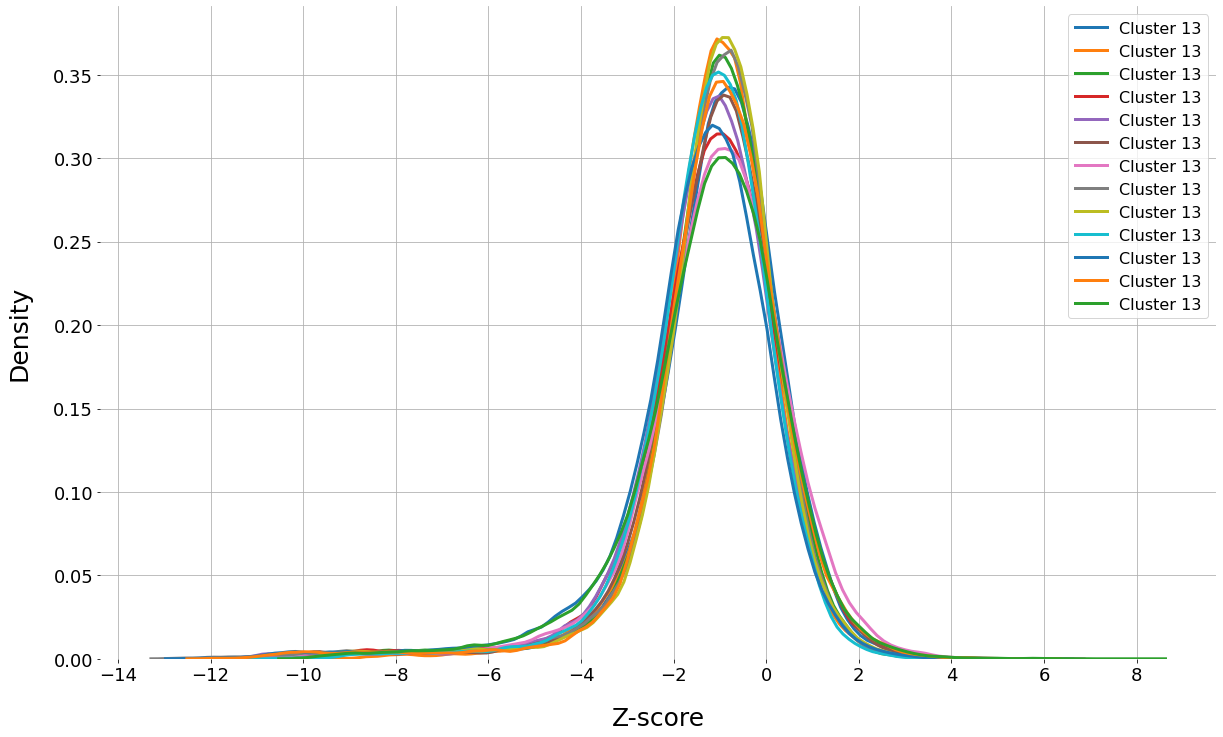

In [6]:
# visualize Z-score distribution in each cluster using KDE 

cluster_name = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5',
               'Cluster 6', 'Cluster 7', 'Cluster 8', 'Cluster 9', 'Cluster 10',
                'Cluster 11', 'Cluster 12', 'Cluster 13']

plt.figure(figsize=[20,12])
for cluster in data:
    sns.distplot(data[cluster], kde = True,
            kde_kws = {'linewidth': 3}, label = cluster_name[i],
            hist = False
                )

plt.legend(prop={'size': 16})
plt.xlabel('Z-score', fontsize=25, labelpad=22)
plt.ylabel('Density', fontsize=25, labelpad=22)

plt.box(on=False)
plt.grid(axis='both')
plt.xticks(np.arange(-14, 10, 2),fontsize=18)
plt.yticks(fontsize=18)

In [7]:
output = pd.concat([df['compound_stem'],df['SMILES'],binary_data],axis=1)
output
# output.to_csv('../../Data/ML_data/binary_13_clusters.csv',index=False)

,compound_stem,SMILES,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13
0,A00052363,CN(C)C(=O)CC1CC2(CCN(CC2)C(=O)N2CCCC2)Oc2ccccc12,0,0,0,0,0,0,0,0,0,0,0,0,0
1,A00055639,Cc1c([nH]c2CC(CC(=O)c12)c1ccco1)C(=O)OCC1CCCO1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,A00064324,CNC(=O)CN1CCC11CCN(C1)C(=O)c1ccn(C)n1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A00076817,Cn1cc(cn1)N1CCC2(CCN(C2)C(=O)c2ccncc2)C1=O,0,0,0,0,0,0,0,0,0,0,0,0,0
4,A00079315,CC(C)CN1CC2CN(CC2C1)S(=O)(=O)c1ccccc1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47212,M97113494,[Zn++].CCC(C)[C@H](N)C1=NCC(S1)C(=O)N[C@@H](CC...,0,0,0,0,0,0,0,0,0,0,0,0,0
47213,M97315308,CCCNC(=O)[C@@H]1[C@@H](CO)[C@@H]2Cn3c(=O)c(ccc...,0,0,0,0,0,0,0,0,0,0,0,0,0
47214,M97497096,C\C=C\c1ccc2[C@H]3N[C@H]([C@H](CO)[C@H]3Cn2c1=...,0,0,0,0,0,0,0,0,0,0,0,0,0
47215,M99992213,CCN1[C@@H](C(=O)Nc2ccccc2)[C@H](CO)[C@H]2Cn3c(...,0,0,0,0,0,0,0,0,0,0,0,0,0
